In [40]:
# import libraries
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import math
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# set imagesize and path of dataset
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# set layes trainable to false
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('Dataset/train/*')
folders

['Dataset/train\\buildings',
 'Dataset/train\\forest',
 'Dataset/train\\glacier',
 'Dataset/train\\mountain',
 'Dataset/train\\sea',
 'Dataset/train\\street']

In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
# compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# generate the test and trian data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Dataset/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [13]:
test_set = train_datagen.flow_from_directory('Dataset/test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [14]:
BATCH_SIZE = 32
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
steps_per_epoch = compute_steps_per_epoch(len(training_set))
val_steps = compute_steps_per_epoch(len(test_set))
m = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps 
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
14/14 [==============================] - 211s 15s/step - loss: 1.2025 - accuracy: 0.5268 - val_loss: 0.7117 - val_accuracy: 0.6979
Epoch 2/50
14/14 [==============================] - 210s 15s/step - loss: 0.6969 - accuracy: 0.7299 - val_loss: 0.6492 - val_accuracy: 0.7708
Epoch 3/50
14/14 [==============================] - 210s 15s/step - loss: 0.5493 - accuracy: 0.8036 - val_loss: 0.5635 - val_accuracy: 0.7708
Epoch 4/50
14/14 [==============================] - 212s 15s/step - loss: 0.5540 - accuracy: 0.8036 - val_loss: 0.5885 - val_accuracy: 0.7812
Epoch 5/50
14/14 [==============================] - 210s 15s/step - loss: 0.4313 - accuracy: 0.8415 - val_loss: 0.6244 - val_accuracy: 0.7812
Epoch 6/50
14/14 [==============================] - 210s 15s/step - loss: 0.4582 - accuracy: 0.8348 - val_loss: 0.5277 - val_accuracy: 0.8125
Epoch 7/50
14/14 [==============================] - 210s 15s/step - loss

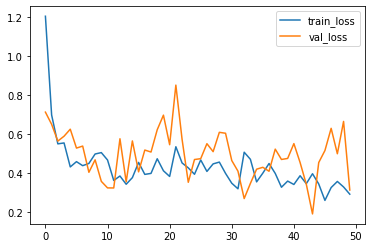

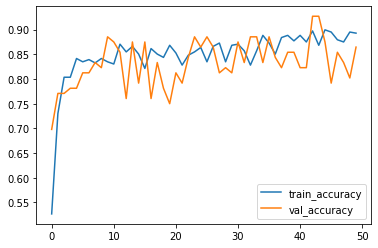

In [15]:
plt.plot(m.history['loss'], label='train_loss')
plt.plot(m.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(m.history['accuracy'], label='train_accuracy')
plt.plot(m.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('vgg16.h5')

In [34]:
img = image.load_img("Dataset/test/mountain/21004.jpg",target_size=(224,224))

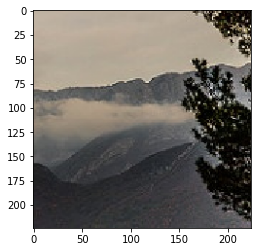

In [35]:
img = np.asarray(img)
plt.imshow(img)

In [36]:
img = np.expand_dims(img, axis=0)

In [37]:
saved_model = load_model("vgg16.h5")

In [38]:
output = saved_model.predict(img)

In [39]:
if output[0][0] == 1.0:
    print('Buildings')
elif output[0][1] == 1.0:
    print('forest')
elif output[0][2] == 1.0:
    print('glacier')
elif output[0][3] == 1.0:
    print('mountain')
elif output[0][4] == 1.0:
    print('sea')
else:
    print('street')

mountain
